In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,Resort Hotel,False,342,July,27,BB,PRT,Direct,0,0,...,3,No Deposit,0,Transient,0.0,0,0,0,2.0,False
1,Resort Hotel,False,737,July,27,BB,PRT,Direct,0,0,...,4,No Deposit,0,Transient,0.0,0,0,0,2.0,False
2,Resort Hotel,False,7,July,27,BB,GBR,Direct,0,0,...,0,No Deposit,0,Transient,75.0,0,0,1,1.0,True
3,Resort Hotel,False,13,July,27,BB,GBR,Corporate,0,0,...,0,No Deposit,0,Transient,75.0,0,0,1,1.0,False
4,Resort Hotel,False,14,July,27,BB,GBR,Online TA,0,0,...,0,No Deposit,0,Transient,98.0,0,1,2,2.0,False


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'meal', 'country', 'market_segment',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_stay', 'guests', 'different_room_assigned'],
      dtype='object')

In [5]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
meal                              0
country                           0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
total_stay                        0
guests                            0
different_room_assigned           0
dtype: int64

In [6]:
df.duplicated().sum()

19152

In [7]:
df['booking_status']=df['is_canceled'].replace({True:1,False:0})

In [8]:
df['customer_type'].value_counts()

Transient          76684
Transient-Party    23854
Contract            3530
Group                569
Name: customer_type, dtype: int64

<AxesSubplot:xlabel='lead_time'>

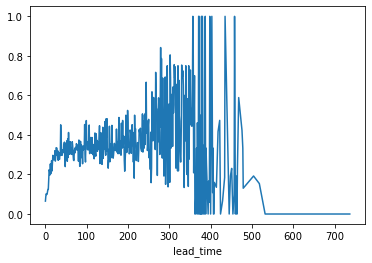

In [9]:
df.groupby('lead_time')['is_canceled'].mean().plot()

<AxesSubplot:xlabel='arrival_date_month'>

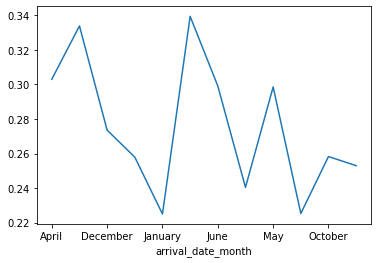

In [10]:
df.groupby('arrival_date_month')['is_canceled'].mean().plot()

In [11]:
df.corr()

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned,booking_status
is_canceled,1.000000,0.152534,0.004090,-0.065045,0.084401,-0.046908,-0.098616,-0.005762,0.110128,-0.171925,-0.125889,0.079270,0.098994,-0.211342,1.000000
lead_time,0.152534,1.000000,0.104909,-0.119454,0.048148,-0.074768,0.055796,0.169858,0.000895,-0.099183,0.009203,0.258014,0.104658,-0.111117,0.152534
arrival_date_week_number,0.004090,0.104909,1.000000,-0.034784,0.013862,-0.022228,0.007451,0.036672,0.090719,0.003115,0.030674,0.021163,0.024765,0.009193,0.004090
is_repeated_guest,-0.065045,-0.119454,-0.034784,1.000000,0.164091,0.421575,0.005288,-0.017344,-0.152806,0.072695,-0.002876,-0.116758,-0.145612,0.078138,-0.065045
previous_cancellations,0.084401,0.048148,0.013862,0.164091,1.000000,0.289614,-0.017515,0.001147,-0.069599,-0.008922,-0.018764,-0.005746,-0.028176,-0.018736,0.084401
previous_bookings_not_canceled,-0.046908,-0.074768,-0.022228,0.421575,0.289614,1.000000,0.007666,-0.006494,-0.081861,0.045236,0.030608,-0.058090,-0.103575,0.040510,-0.046908
booking_changes,-0.098616,0.055796,0.007451,0.005288,-0.017515,0.007666,1.000000,0.001823,0.009420,0.054614,0.022293,0.087311,-0.012184,0.076714,-0.098616
days_in_waiting_list,-0.005762,0.169858,0.036672,-0.017344,0.001147,-0.006494,0.001823,1.000000,-0.041916,-0.023873,-0.064912,-0.014478,-0.021918,0.009463,-0.005762
adr,0.110128,0.000895,0.090719,-0.152806,-0.069599,-0.081861,0.009420,-0.041916,1.000000,0.052767,0.166137,0.060885,0.406517,-0.163097,0.110128
required_car_parking_spaces,-0.171925,-0.099183,0.003115,0.072695,-0.008922,0.045236,0.054614,-0.023873,0.052767,1.000000,0.060035,-0.036747,0.041444,0.069495,-0.171925


<AxesSubplot:>

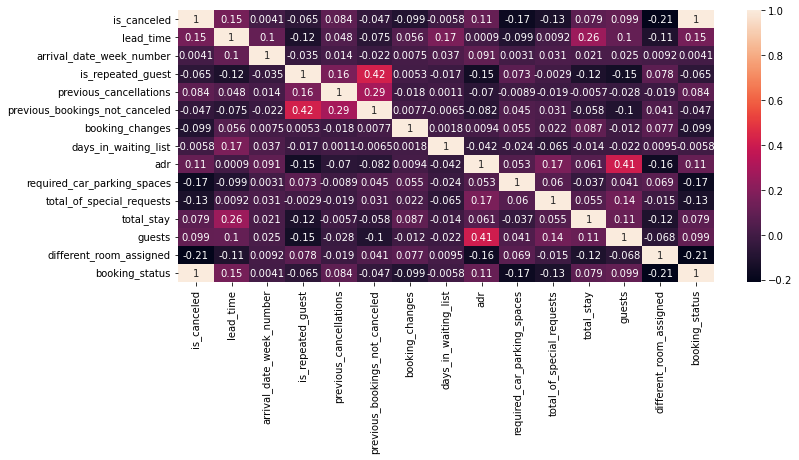

In [12]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [13]:
df['market_segment']

0                Direct
1                Direct
2                Direct
3             Corporate
4             Online TA
              ...      
104632    Offline TA/TO
104633        Online TA
104634        Online TA
104635        Online TA
104636        Online TA
Name: market_segment, Length: 104637, dtype: object

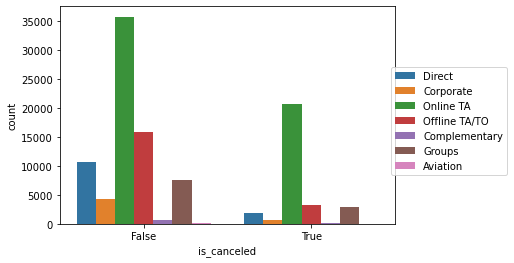

In [14]:
sns.countplot(x=df['is_canceled'],hue=df['market_segment'])
plt.legend(bbox_to_anchor=(1.35,0.2),loc='lower right')

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

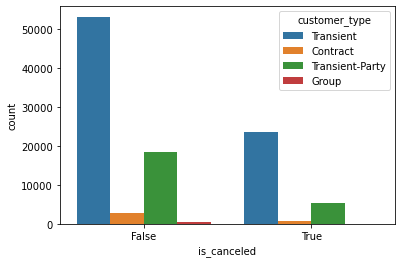

In [15]:
sns.countplot(x=df['is_canceled'],hue=df['customer_type'])

In [16]:
df['booking_status'].mean()

0.2837428443093743

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104637 entries, 0 to 104636
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           104637 non-null  object 
 1   is_canceled                     104637 non-null  bool   
 2   lead_time                       104637 non-null  int64  
 3   arrival_date_month              104637 non-null  object 
 4   arrival_date_week_number        104637 non-null  int64  
 5   meal                            104637 non-null  object 
 6   country                         104637 non-null  object 
 7   market_segment                  104637 non-null  object 
 8   is_repeated_guest               104637 non-null  int64  
 9   previous_cancellations          104637 non-null  int64  
 10  previous_bookings_not_canceled  104637 non-null  int64  
 11  booking_changes                 104637 non-null  int64  
 12  deposit_type    

In [18]:
df['country'].value_counts().head(10)

PRT    34836
GBR    11917
FRA    10403
ESP     8431
DEU     7241
ITA     3765
IRL     3369
BEL     2321
BRA     2222
NLD     2097
Name: country, dtype: int64

In [19]:
df['country'].nunique()

177

<AxesSubplot:xlabel='adr'>

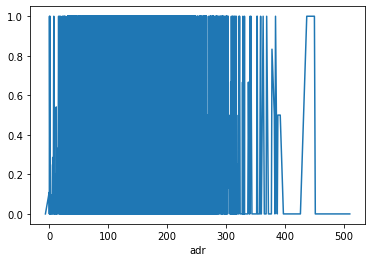

In [20]:
df.groupby('adr')['booking_status'].mean().plot()

<AxesSubplot:xlabel='booking_status', ylabel='adr'>

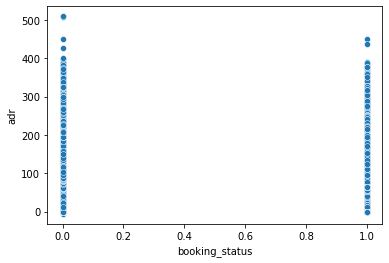

In [21]:
sns.scatterplot(y=df['adr'],x=df['booking_status'])

<AxesSubplot:xlabel='guests', ylabel='adr'>

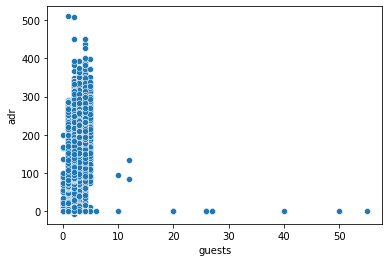

In [22]:
sns.scatterplot(x=df['guests'],y=df['adr'],data=df)

<AxesSubplot:xlabel='guests'>

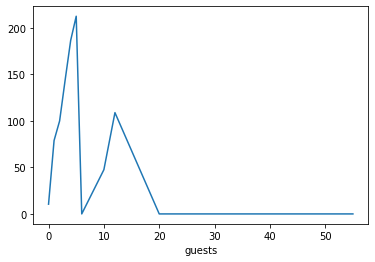

In [23]:
df.groupby('guests')['adr'].mean().plot()

In [24]:
df['adr'].mean()

103.5278916635571

In [25]:
df['guests'].value_counts()

2.0     70125
1.0     19789
3.0     10466
4.0      3923
0.0       180
5.0       137
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: guests, dtype: int64

C:\Users\Hakim Aljanabi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='market_segment', ylabel='count'>

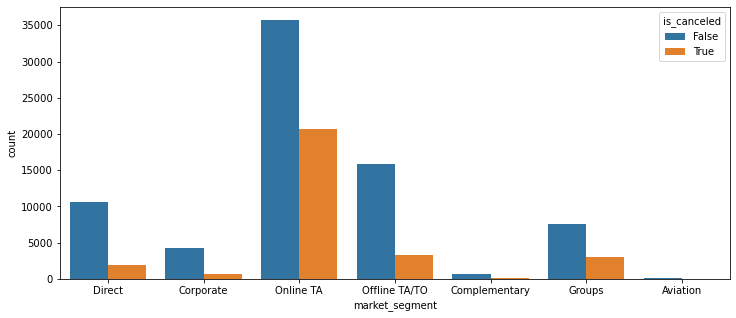

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(df['market_segment'],hue=df['is_canceled'])

<AxesSubplot:>

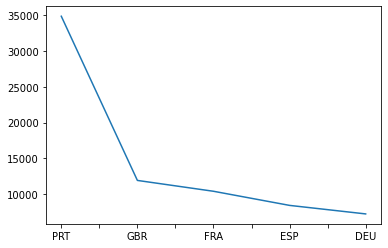

In [27]:
df['country'].value_counts().head().plot()

In [28]:
df1 = df[df['country']=='PRT']
df2 = df[df['country']=='GBR']
df3 = df[df['country']=='FRA']
df4 = df[df['country']=='ESP']
df5 = df[df['country']=='DEU']

In [29]:
df_complete = pd.concat([df1,df2,df3,df4,df5])

C:\Users\Hakim Aljanabi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='count'>

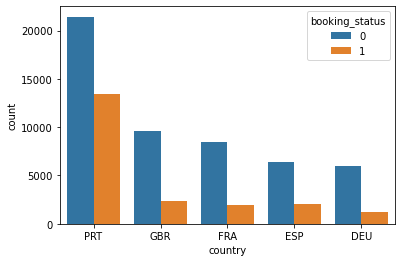

In [30]:
sns.countplot(df_complete['country'],hue=df_complete['booking_status'])

In [31]:
df_complete

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned,booking_status
0,Resort Hotel,False,342,July,27,BB,PRT,Direct,0,0,...,No Deposit,0,Transient,0.00,0,0,0,2.0,False,0
1,Resort Hotel,False,737,July,27,BB,PRT,Direct,0,0,...,No Deposit,0,Transient,0.00,0,0,0,2.0,False,0
6,Resort Hotel,False,0,July,27,BB,PRT,Direct,0,0,...,No Deposit,0,Transient,107.00,0,0,2,2.0,False,0
7,Resort Hotel,False,9,July,27,FB,PRT,Direct,0,0,...,No Deposit,0,Transient,103.00,0,1,2,2.0,False,0
8,Resort Hotel,True,85,July,27,BB,PRT,Online TA,0,0,...,No Deposit,0,Transient,82.00,0,1,3,2.0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104627,City Hotel,False,44,August,35,SC,DEU,Online TA,0,0,...,No Deposit,0,Transient,140.75,0,1,4,2.0,False,0
104628,City Hotel,False,188,August,35,BB,DEU,Direct,0,0,...,No Deposit,0,Transient,99.00,0,0,5,2.0,False,0
104630,City Hotel,False,164,August,35,BB,DEU,Offline TA/TO,0,0,...,No Deposit,0,Transient,87.60,0,0,6,2.0,False,0
104634,City Hotel,False,34,August,35,BB,DEU,Online TA,0,0,...,No Deposit,0,Transient,157.71,0,4,7,2.0,False,0


C:\Users\Hakim Aljanabi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hotel', ylabel='count'>

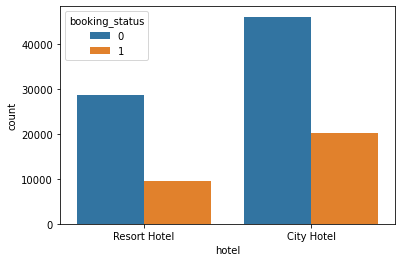

In [32]:
sns.countplot(df['hotel'],hue=df['booking_status'])

In [33]:
df['total_stay'].value_counts()

3     22506
2     21205
1     19632
4     16148
7      8343
5      7375
6      3536
8      1161
10     1139
14      895
9       822
0       715
11      396
12      203
13      142
15       75
21       56
16       40
25       37
18       35
28       35
19       22
17       20
20       14
22       14
29       14
30       13
26        6
24        6
35        5
27        5
42        4
23        3
33        3
56        2
46        1
60        1
69        1
45        1
38        1
48        1
49        1
57        1
34        1
43        1
Name: total_stay, dtype: int64

In [34]:
df['deposit_type'].unique()

array(['No Deposit'], dtype=object)

In [35]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'meal', 'country', 'market_segment',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_stay', 'guests', 'different_room_assigned', 'booking_status'],
      dtype='object')

In [36]:
df['customer_type'].value_counts()

Transient          76684
Transient-Party    23854
Contract            3530
Group                569
Name: customer_type, dtype: int64

In [37]:
df['total_of_special_requests'].value_counts()

0    55611
1    33187
2    12963
3     2496
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [38]:
df['required_car_parking_spaces'].value_counts()

0    97240
1     7366
2       26
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

In [39]:
df['days_in_waiting_list'].value_counts()

0      102970
58        164
63         82
87         80
223        61
        ...  
18          1
93          1
109         1
37          1
23          1
Name: days_in_waiting_list, Length: 99, dtype: int64

array([[<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'adr'}>],
       [<AxesSubplot:title={'center':'required_car_parking_spaces'}>,
        <AxesSubplot:title={'center':'total_of_special_requests'}>,
        <AxesSubplot:title={'center':'total_stay'}>,
        <AxesSubplot:title={'center':'guests'}>],
       [<AxesSubplot:title={'center':'booking_status'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<Figure size 864x360 with 0 Axes>

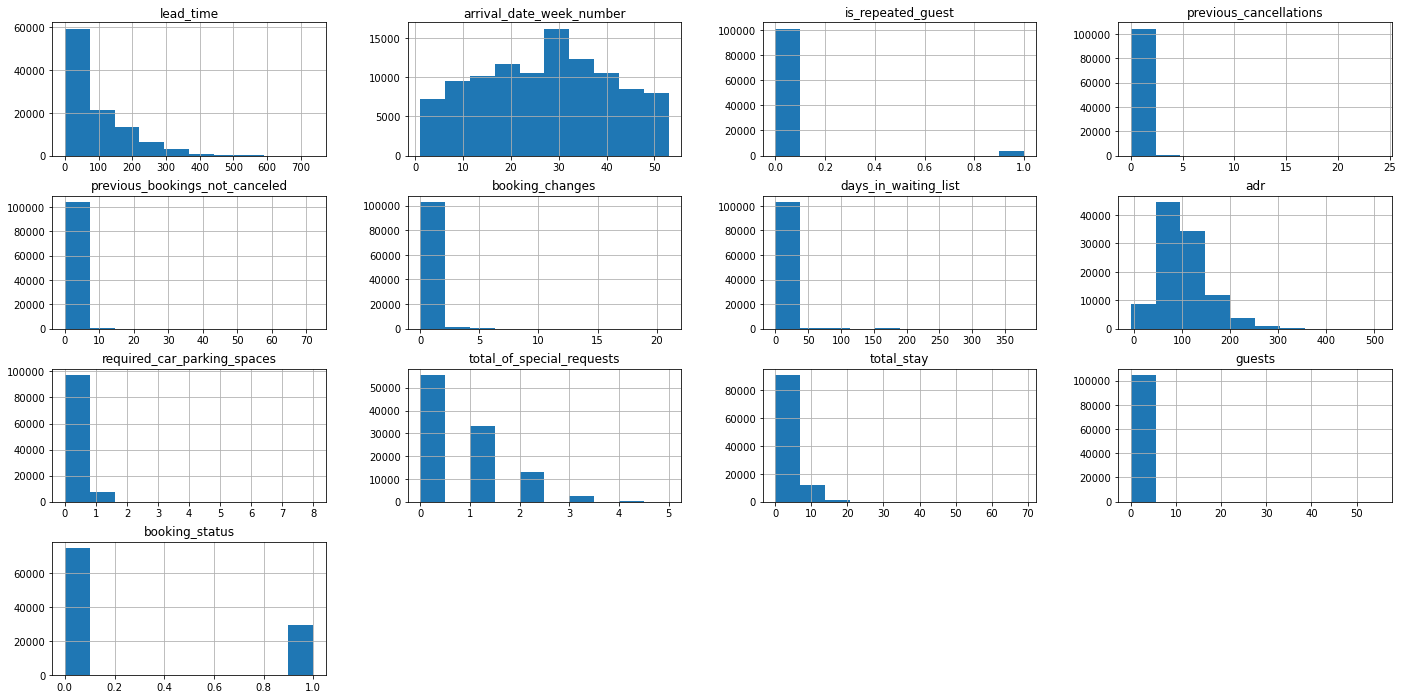

In [40]:
plt.figure(figsize=(12,5))
df.hist(figsize=(24,12))

<AxesSubplot:xlabel='market_segment', ylabel='count'>

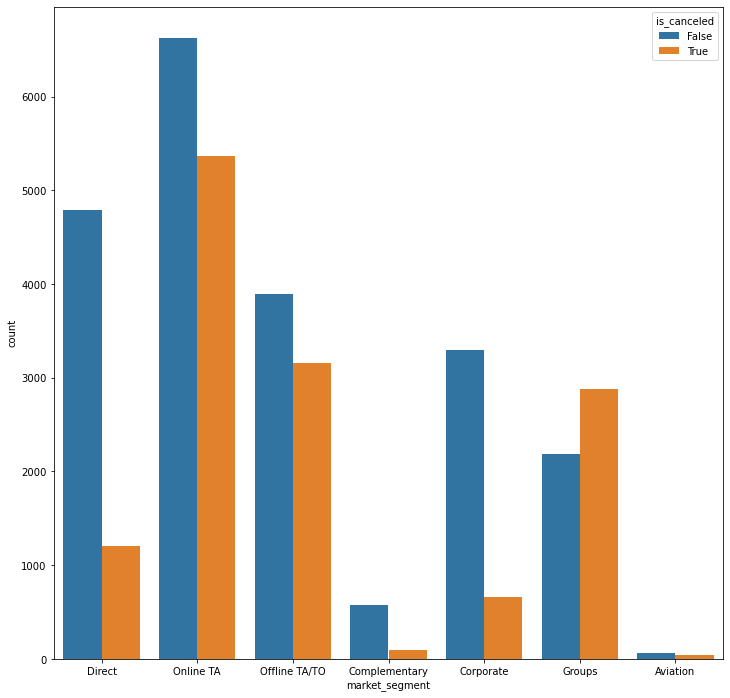

In [43]:
plt.figure(figsize=(12,12))
sns.countplot(x=df1['market_segment'],hue=df['is_canceled'])

<AxesSubplot:xlabel='market_segment', ylabel='count'>

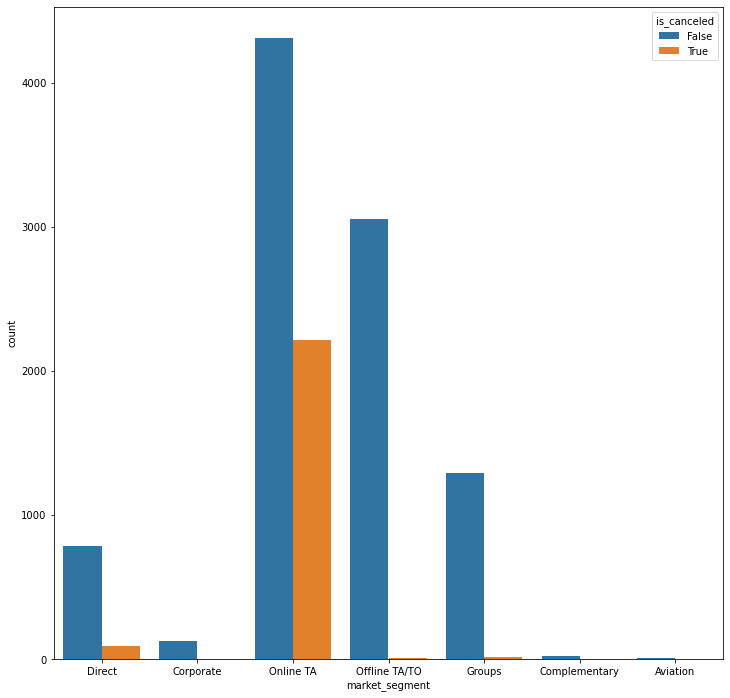

In [63]:
df2.groupby('arrival_date_month')['adr'].mean().plot()

<AxesSubplot:xlabel='lead_time'>

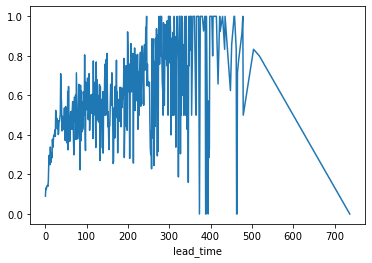

In [47]:
df1.groupby('lead_time')['is_canceled'].mean().plot()

<AxesSubplot:xlabel='lead_time'>

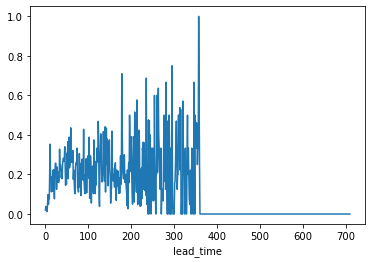

In [48]:
df2.groupby('lead_time')['is_canceled'].mean().plot()

In [49]:
df1['lead_time'].mean()

74.2774428751866

In [50]:
df2['lead_time'].mean()

126.02534194847696

In [51]:
df1['adr'].mean()

92.29765903088585

In [52]:
df2['adr'].mean()

96.72935973818956

<AxesSubplot:xlabel='arrival_date_month'>

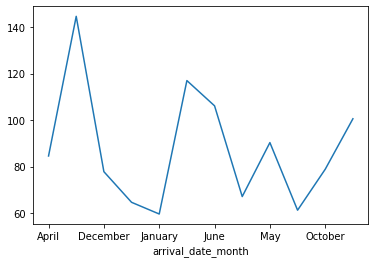

In [59]:
df1.groupby('arrival_date_month')['adr'].mean().plot()

<AxesSubplot:xlabel='arrival_date_month'>

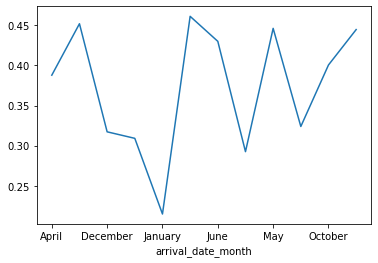

In [60]:
df1.groupby('arrival_date_month')['is_canceled'].mean().plot()

<AxesSubplot:xlabel='arrival_date_month'>

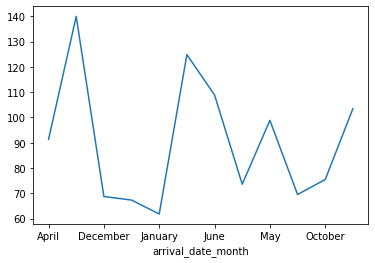

In [61]:
df2.groupby('arrival_date_month')['adr'].mean().plot()

<AxesSubplot:xlabel='arrival_date_month'>

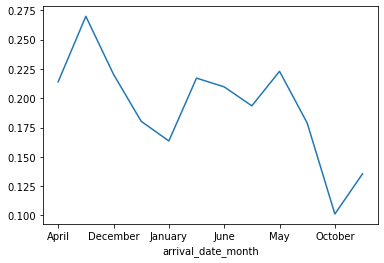

In [62]:
df2.groupby('arrival_date_month')['is_canceled'].mean().plot()

<AxesSubplot:xlabel='arrival_date_month'>

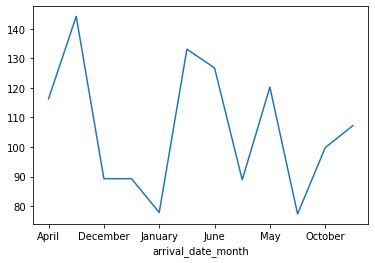

In [64]:
df3.groupby('arrival_date_month')['adr'].mean().plot()

<AxesSubplot:xlabel='arrival_date_month'>

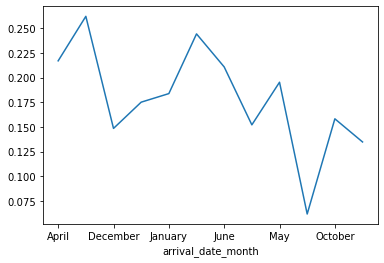

In [66]:
df3.groupby('arrival_date_month')['is_canceled'].mean().plot()

<AxesSubplot:xlabel='arrival_date_month'>

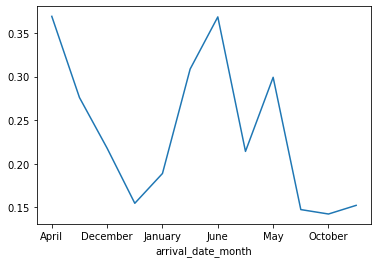

In [67]:
df4.groupby('arrival_date_month')['is_canceled'].mean().plot()

<AxesSubplot:xlabel='arrival_date_month'>

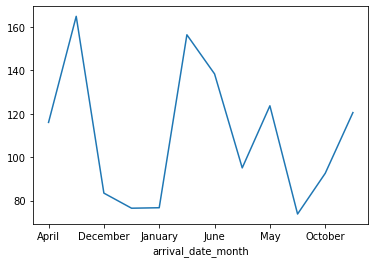

In [69]:
df4.groupby('arrival_date_month')['adr'].mean().plot()

<AxesSubplot:xlabel='market_segment', ylabel='count'>

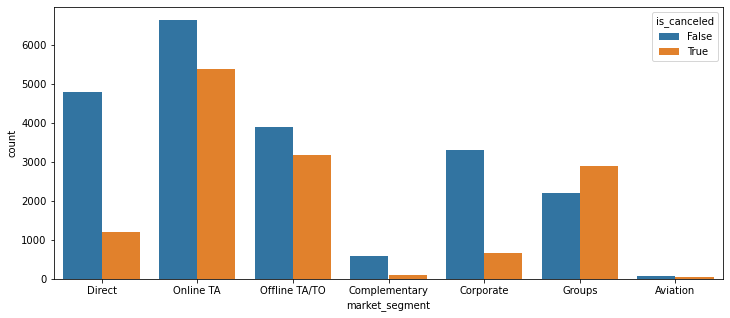

In [72]:
plt.figure(figsize=(12,5))
sns.countplot(x=df1['market_segment'],hue=df1['is_canceled'])

<AxesSubplot:xlabel='market_segment', ylabel='count'>

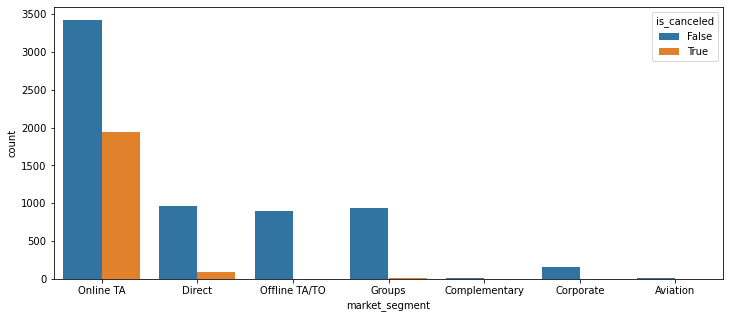

In [73]:
plt.figure(figsize=(12,5))
sns.countplot(x=df4['market_segment'],hue=df4['is_canceled'])